<a href="https://colab.research.google.com/github/JNarimatsu/Vendas_online_Desafio01_ONE/blob/main/Vendas_online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto desafio 1: vendas online
O objetivo desse projeto é realizar uma análise dos resultados de um evento com os clientes de uma empresa de vendas online. Foi coletado um conjunto de dados que contém os clientes que mais gastaram com produtos dentro de 5 dias de vendas, que é o período de duração do evento. Essa análise vai identificar o cliente com a maior compra na semana, que irá receber um prêmio da loja, e posteriormente, ela pode ajudar a empresa a criar novas estratégias para atrair mais clientes.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
url_vendas = 'https://cdn3.gnarususercontent.com.br/2928-transformacao-manipulacao-dados/dados_vendas_clientes.json'

In [99]:
dados_vendas = pd.read_json(url_vendas)
dados_vendas.head()

,dados_vendas
0,"{'Data de venda': '06/06/2022', 'Cliente': ['@..."
1,"{'Data de venda': '07/06/2022', 'Cliente': ['I..."
2,"{'Data de venda': '08/06/2022', 'Cliente': ['I..."
3,"{'Data de venda': '09/06/2022', 'Cliente': ['J..."
4,"{'Data de venda': '10/06/2022', 'Cliente': ['M..."


In [100]:
dados_vendas = pd.json_normalize(dados_vendas['dados_vendas'])
dados_vendas.head()

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


In [101]:
colunas = list(dados_vendas.columns)
colunas
#A variável colunas passa a conter uma lista com todos os nomes das colunas do DataFrame.

['Data de venda', 'Cliente', 'Valor da compra']

In [102]:
dados_vendas = dados_vendas.explode(colunas[1:])
dados_vendas
#"Explode" A coluna para deixar como dataframe

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
1,07/06/2022,Isabely JOanes 738,"R$ 825,31"
1,07/06/2022,Isabely JOanes 738,"R$ 168,07"
1,07/06/2022,Isabely JOanes 738,"R$ 339,18"
1,07/06/2022,Isabely JOanes 738,"R$ 314,69"
2,08/06/2022,Isabely JOanes 738,"R$ 682,05"
2,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [103]:
dados_vendas.reset_index(inplace =True, drop = True)
dados_vendas.head()
#Reseta o indice e reorganiza-o

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
1,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
2,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
3,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
4,07/06/2022,Isabely JOanes 738,"R$ 825,31"


In [104]:
dados_vendas['Data de venda'] = pd.to_datetime(dados_vendas['Data de venda'], format='%d/%m/%Y')

In [105]:
dados_vendas['Valor da compra'] = dados_vendas['Valor da compra'].apply(lambda x: x.replace('R$','').replace(',', '.').strip())

In [106]:
dados_vendas['Valor da compra'] = dados_vendas['Valor da compra'].astype(np.float64)

In [107]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data de venda    20 non-null     datetime64[ns]
 1   Cliente          20 non-null     object        
 2   Valor da compra  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.0+ bytes


In [108]:
# Converter para minúsculas e remover caracteres especiais
dados_vendas['Cliente'] = (
    dados_vendas['Cliente']
    .astype(str)  # Garante que é string
    .str.lower()  # Minúsculas
    .str.replace(r'[^a-záàâãéèêíïóôõöúçñ\s]', '', regex=True)  # Remove caracteres especiais
    .str.replace(r'\s+', ' ', regex=True)  # Remove múltiplos espaços
    .str.strip()  # Remove espaços no início/fim
)

print(dados_vendas)

   Data de venda         Cliente  Valor da compra
0     2022-06-06       ana lucia           836.50
1     2022-06-06  diego armandiu           573.33
2     2022-06-06  diego armandiu           392.80
3     2022-06-06  diego armandiu           512.34
4     2022-06-07  isabely joanes           825.31
5     2022-06-07  isabely joanes           168.07
6     2022-06-07  isabely joanes           339.18
7     2022-06-07  isabely joanes           314.69
8     2022-06-08  isabely joanes           682.05
9     2022-06-08    joão gabriel           386.34
10    2022-06-08  julya meireles           622.65
11    2022-06-08  julya meireles           630.79
12    2022-06-09  julya meireles           390.30
13    2022-06-09     maria julia           759.16
14    2022-06-09     maria julia           334.47
15    2022-06-09     maria julia           678.78
16    2022-06-10     maria julia           314.24
17    2022-06-10     pedro pasco           311.15
18    2022-06-10    paulo castro           899.16


In [109]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data de venda    20 non-null     datetime64[ns]
 1   Cliente          20 non-null     object        
 2   Valor da compra  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 612.0+ bytes


In [110]:
dados_vendas['Data de venda'] = dados_vendas['Data de venda'].dt.strftime('%d/%m/%Y')

In [111]:
subset = dados_vendas.groupby([dados_vendas['Data de venda'], 'Cliente'])['Valor da compra'].sum()
subset

Data de venda  Cliente       
06/06/2022     ana lucia          836.50
               diego armandiu    1478.47
07/06/2022     isabely joanes    1647.25
08/06/2022     isabely joanes     682.05
               joão gabriel       386.34
               julya meireles    1253.44
09/06/2022     julya meireles     390.30
               maria julia       1772.41
10/06/2022     maria julia        314.24
               paulo castro       899.16
               pedro pasco        311.15
               thiago fritzz      885.24
Name: Valor da compra, dtype: float64

In [116]:
subset.sort_values(ascending=False, inplace=True)
subset

Data de venda  Cliente       
09/06/2022     maria julia       1772.41
07/06/2022     isabely joanes    1647.25
06/06/2022     diego armandiu    1478.47
08/06/2022     julya meireles    1253.44
10/06/2022     paulo castro       899.16
               thiago fritzz      885.24
06/06/2022     ana lucia          836.50
08/06/2022     isabely joanes     682.05
09/06/2022     julya meireles     390.30
08/06/2022     joão gabriel       386.34
10/06/2022     maria julia        314.24
               pedro pasco        311.15
Name: Valor da compra, dtype: float64

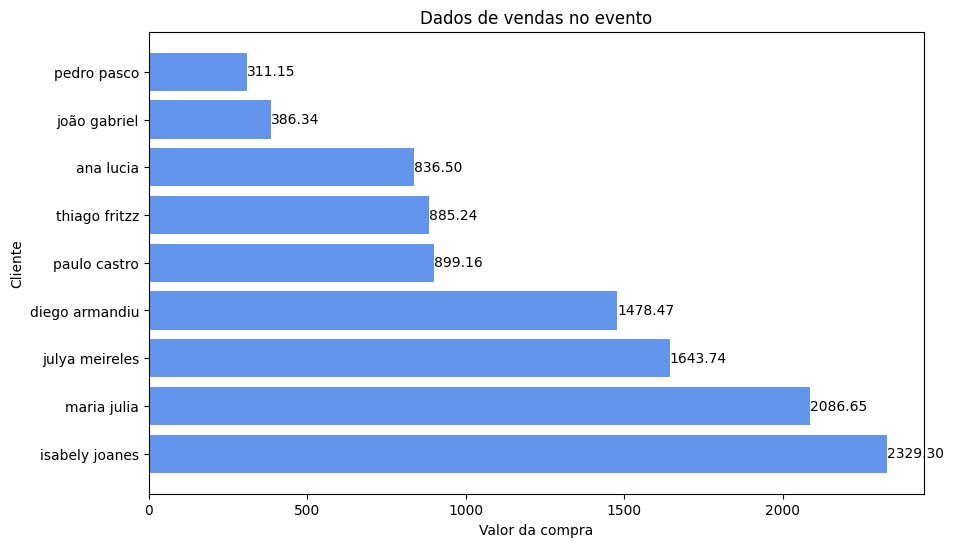

Cliente com maior valor de compra:
Cliente
isabely joanes    2329.3
Name: Valor da compra, dtype: float64


In [133]:
plt.figure(figsize=(10,6))
bars = plt.barh(compras_totais_por_cliente.index, compras_totais_por_cliente.values, color='cornflowerblue')
plt.title('Dados de vendas no evento')
plt.xlabel('Valor da compra')
plt.ylabel('Cliente')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.show()

print('Cliente com maior valor de compra:')
print(compras_totais_por_cliente.head(1))

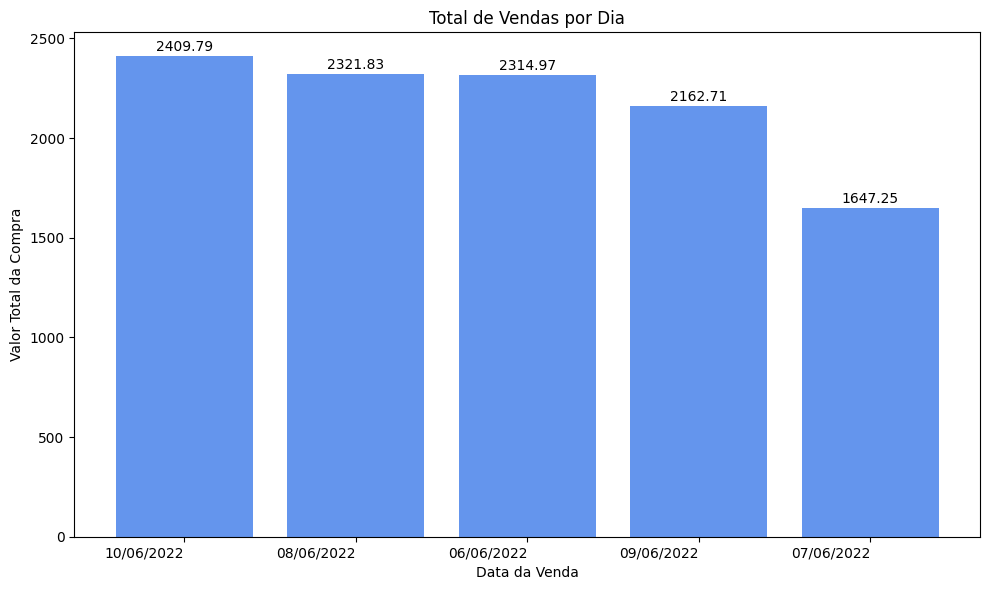

Dia com a maior venda:
Data de venda
10/06/2022    2409.79
Name: Valor da compra, dtype: float64


In [126]:
total_vendas_por_dia = dados_vendas.groupby('Data de venda')['Valor da compra'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(total_vendas_por_dia.index, total_vendas_por_dia.values, color='cornflowerblue')
plt.title('Total de Vendas por Dia')
plt.xlabel('Data da Venda')
plt.ylabel('Valor Total da Compra')
plt.xticks(rotation=0, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Dia com a maior venda:')
print(total_vendas_por_dia.head(1))

# Conclusões
Nosso conjunto de dados era um conjunto enxuto, com informações mais diretas para chegarmos ao resultado desejado.Com mais dados poderiamos verificar algumas teorias. Será que o último dia teve mais vendas por conta de indicações de cliente que compraram em dias anteriores? Esse seria o mesmo motivo para o primeiro dia ter tido menos vendas que os demais? Teria alguma abordagem do nosso marketing que poderia ter ajudado a impulsionar as vendas? Com as informações que tinhamos conseguimos verificar que o cliente que realizou a compra de maior valor foi a cliente Isabely joanes, que realizou compras no valor de 2329.3, as compras de Isabely foram realizados em dois dias diferentes. Além disso podemos verificar que o dia com maior venda foi o último dia, dia 10 de junho de 2022. Com mais dados poderiamos verificar algumas teorias. Será que o dia teve mais vendas por conta de indicações de cliente que compraram em dias anteriores? Esse seria o mesmo motivo para o primeiro dia ter tido menos vendas que os demais? Teria alguma abordagem do nosso marketing que poderia ter ajudado a impulsionar as vendas?